Excel file saved as Election_Results.xlsx


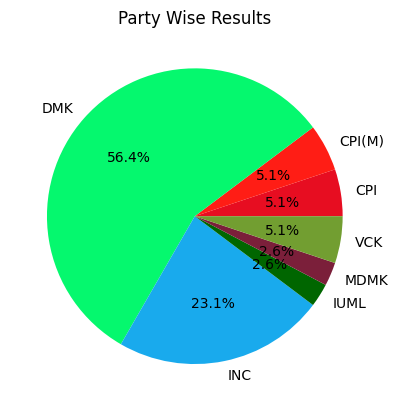

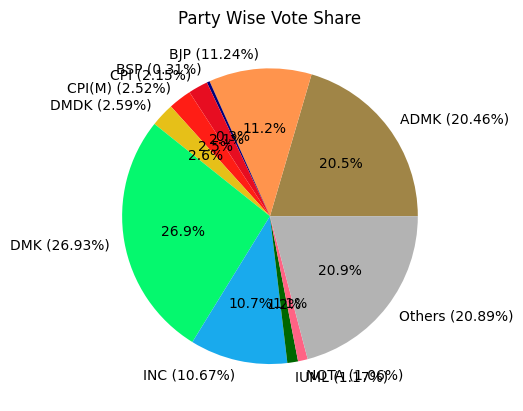

In [ ]:
# Install necessary libraries
!pip install pandas openpyxl matplotlib

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from openpyxl import Workbook
from openpyxl.drawing.image import Image
from openpyxl.utils.dataframe import dataframe_to_rows

# Extracted data from the HTML
data_summary = [
    ["Party", "Won", "Leading", "Total"],
    ["DMK", 22, 0, 22],
    ["INC", 9, 0, 9],
    ["VCK", 2, 0, 2],
    ["CPI", 2, 0, 2],
    ["CPI(M)", 2, 0, 2],
    ["MDMK", 1, 0, 1],
    ["IUML", 1, 0, 1]
]

data_donut = {
    "Party": ["CPI", "CPI(M)", "DMK", "INC", "IUML", "MDMK", "VCK"],
    "Count": [2, 2, 22, 9, 1, 1, 2],
    "Color": ["#e70d21", "#FF1D15", "#05F86E", "#19AAED", "#006600", "#7B1F3A", "#729E31"]
}

data_pie = {
    "Party": ["ADMK", "BJP", "BSP", "CPI", "CPI(M)", "DMDK", "DMK", "INC", "IUML", "NOTA", "Others"],
    "Votes": [8880801, 4880954, 136325, 932954, 1095592, 1123444, 11689879, 4632770, 506690, 461327, 9068689],
    "Percentage": ["20.46%", "11.24%", "0.31%", "2.15%", "2.52%", "2.59%", "26.93%", "10.67%", "1.17%", "1.06%", "20.89%"],
    "Color": ["#A08547", "#ff944d", "#000078", "#e70d21", "#FF1D15", "#E6C018", "#05F86E", "#19AAED", "#006600", "#ff6384", "#b3b3b3"]
}

# Create DataFrames
df_summary = pd.DataFrame(data_summary[1:], columns=data_summary[0])
df_donut = pd.DataFrame(data_donut)
df_pie = pd.DataFrame(data_pie)

# Create Excel file
wb = Workbook()
ws_summary = wb.active
ws_summary.title = "Summary"

# Add summary data
for r in dataframe_to_rows(df_summary, index=False, header=True):
    ws_summary.append(r)

# Add a new sheet for detailed results
ws_detailed = wb.create_sheet(title="Detailed Results")
for r in dataframe_to_rows(df_summary, index=False, header=True):
    ws_detailed.append(r)

# Create doughnut chart
fig1, ax1 = plt.subplots()
ax1.pie(df_donut["Count"], labels=df_donut["Party"], colors=df_donut["Color"], autopct='%1.1f%%')
ax1.set_title("Party Wise Results")
plt.savefig("donut_chart.png")

# Add doughnut chart to Excel
img1 = Image("donut_chart.png")
ws_summary.add_image(img1, 'G2')

# Create pie chart
fig2, ax2 = plt.subplots()
ax2.pie(df_pie["Votes"], labels=[f'{p} ({v})' for p, v in zip(df_pie["Party"], df_pie["Percentage"])], colors=df_pie["Color"], autopct='%1.1f%%')
ax2.set_title("Party Wise Vote Share")
plt.savefig("pie_chart.png")

# Add pie chart to Excel
img2 = Image("pie_chart.png")
ws_detailed.add_image(img2, 'G2')

# Save the workbook
output_path = "Election_Results.xlsx"
wb.save(output_path)

print(f"Excel file saved as {output_path}")
